# Part 7

Sperimentazione numerica relativa ai metodi diretti per la risoluzione di sistemi lineari. Saranno impiegate le funzioni per la fattorizzazione LU precedentemente definite nella parte 5.

In [1]:
addpath ("./functions");

## Matrix equation solver

Risolve l'equazione matriciale $AX = B$.

    [X] = matrix_eq_solver(A, B)
    
### Note di funzionamento

Data la matrice:

    C = [1 2 6; 4 3 3]

applica `C(:,3)`, ovvero taglia la i-esima colonna della matrice per ricondursi al sistema lineare $AX = B$. Perciò risolve $n$ sistemi lineari per trovare la matrice inversa. Si tratta di un metodo per la risoluzione di sistemi lineari inefficiente in quanto estremamente costoso.

    [X] = matrix_eq_solver(A, B)

In [2]:
function [X] = matrix_eq_solver(A, B)

[~, n] = size(B);
[L, U, P] = gauss_partial(A);

Y = zeros(n);
X = zeros(n);

for i = 1:n
    Y(:,i) = lsolve(L, P * B(:, i));
    X(:,i) = usolve(U, Y(:, i));
end

end

## Esercizio 1

In [3]:
A = [1 2 3; 0 0 1; 1 3 5];
b = [6; 1; 9];
A_1 = [1 1 0 3; 2 1 -1 1; -1 2 3 -1; 3 -1 -1 2];
b_1 = [5; 3; 3; 3];

In [4]:
[~, ~] = gauss_simple(A);

elemento diagonale nullo


In [5]:
[L_1, U_1] = gauss_simple(A_1);

elemento diagonale nullo


Il metodo di fattorizzazione di Gauss senza strategie di pivoting fallisce perché in entrambi i casi l'esecuzione si blocca a causa della presenza di un elemento pivotale nullo. Ciò non accade applicando l'eliminazione gaussiana con pivoting parziale.

In [6]:
[L_p, U_p, P] = gauss_partial(A);
[x_p] = lusolve(L_p, U_p, P, [], b)

x_p =

   1
   1
   1



In [7]:
[L_1p, U_1p, P_1] = gauss_partial(A_1);
[x_1p] = lusolve(L_1p, U_1p, P_1, [], b_1)

x_1p =

   1.00000
   1.00000
   1.00000
   1.00000



## Esercizio 2

In [8]:
clear x L U P

A = [3 5 7; 2 3 4; 5 9 11];
A_1 = [1 2 3 4; 2 -4 6 8; -1 -2 -3 -1; 5 7 0 1];
B = eye(3);
B_1 = eye(4);

inv(A)

ans =

  -1.50000   4.00000  -0.50000
  -1.00000  -1.00000   1.00000
   1.50000  -1.00000  -0.50000



In [9]:
X = matrix_eq_solver(A, B)

X =

  -1.50000   4.00000  -0.50000
  -1.00000  -1.00000   1.00000
   1.50000  -1.00000  -0.50000



In [10]:
inv(A_1)

ans =

  -0.41667   0.17500  -0.06667   0.20000
   0.25000  -0.12500   0.00000   0.00000
  -0.13889   0.02500  -0.42222  -0.06667
   0.33333   0.00000   0.33333  -0.00000



In [11]:
X_1 = matrix_eq_solver(A_1, B_1)

X_1 =

  -0.41667   0.17500  -0.06667   0.20000
   0.25000  -0.12500  -0.00000  -0.00000
  -0.13889   0.02500  -0.42222  -0.06667
   0.33333   0.00000   0.33333   0.00000



Per risolvere un'equazione matriciale si estrae il vettore dei termini noti dalla matrice  tramite iterazioni. Si risolvono quindi $n$ sistemi lineari.
Se si impiega la fattorizzazione LU senza pivoting si blocca l'algoritmo di Gauss a causa della presenza di elementi pivotali nulli. Per questa ragione la risoluzione degli $n$ sistemi lineari si impiega una strategia di pivoting parziale.

## Esercizio 3

In [12]:
ep = 0;
A = [ep 1; 1 1];
b = [2 + ep, 4]';

[L, U, P] = gauss_partial(A);
x = lusolve(L, U, P, [], b)

x =

   2
   2



In [13]:
for k = 2 : 2 : 18
    ep = 10^-k;
    A_i = [ep 1; 1 1];
    b_i = [ep + 2, 4]';
    [L_1, U_1] = gauss_simple(A_i);
    [L, U, P] = gauss_partial(A_i);
    x_1 = lusolve(L_1, U_1, [], [], b_i);
    x = lusolve(L, U, P, [], b_i);
    fprintf("Gauss senza pivoting:\t\t %f %f \n", x_1);
    fprintf("Gauss con pivoting parziale:\t %f %f\n", x);
end

Gauss senza pivoting:		 2.010101 1.989899 
Gauss con pivoting parziale:	 2.010101 1.989899
Gauss senza pivoting:		 2.000100 1.999900 
Gauss con pivoting parziale:	 2.000100 1.999900
Gauss senza pivoting:		 2.000001 1.999999 
Gauss con pivoting parziale:	 2.000001 1.999999
Gauss senza pivoting:		 2.000000 2.000000 
Gauss con pivoting parziale:	 2.000000 2.000000
Gauss senza pivoting:		 2.000000 2.000000 
Gauss con pivoting parziale:	 2.000000 2.000000
Gauss senza pivoting:		 2.000178 2.000000 
Gauss con pivoting parziale:	 2.000000 2.000000
Gauss senza pivoting:		 1.998401 2.000000 
Gauss con pivoting parziale:	 2.000000 2.000000
Gauss senza pivoting:		 4.440892 2.000000 
Gauss con pivoting parziale:	 2.000000 2.000000
Gauss senza pivoting:		 0.000000 2.000000 
Gauss con pivoting parziale:	 2.000000 2.000000


Quando non si applica la strategia pivotale si nota che per valori molto piccoli l'accuratezza del risultato si riduce. In particolare si nota in questo caso che mano a mano che $\varepsilon$ decresce, il valore di $x_1$ oscilla rispetto al risultato atteso a partire dalla quart'ultima iterazione ovvero per $\varepsilon < 10^{-12}$.

## Esercizio 4

In [14]:
A = [3 1 1 1; 2 1 0 0; 2 0 1 0; 2 0 0 1];
b = [4 1 2 4]';
[L, U] = gauss_simple(A);
L
U

L =

   1.00000   0.00000   0.00000   0.00000
   0.66667   1.00000   0.00000   0.00000
   0.66667  -2.00000   1.00000   0.00000
   0.66667  -2.00000   2.00000   1.00000

U =

   3.00000   1.00000   1.00000   1.00000
   0.00000   0.33333  -0.66667  -0.66667
   0.00000   0.00000  -1.00000  -2.00000
   0.00000   0.00000   0.00000   3.00000



Si nota il fenomeno del *fill-in*, per cui la matrice $A$, avente molti valori nulli, ha fattori $L$ e $U$ [L, U, ~]  = gauss_partial(A);non nulli ad eccezione delle rispettive parti triangolari superiore e inferiore.

In [15]:
[L, U, ~]  = gauss_partial(A);
L
U

L =

   1.00000   0.00000   0.00000   0.00000
   0.66667   1.00000   0.00000   0.00000
   0.66667   1.00000   1.00000   0.00000
   0.66667  -0.50000   0.50000   1.00000

U =

   3.00000   1.00000   1.00000   1.00000
   0.00000  -0.66667   0.33333  -0.66667
   0.00000   0.00000  -1.00000   1.00000
   0.00000   0.00000   0.00000  -1.50000



Si nota che adottando la strategia di pivoting parziale la crescita degli elementi di $U$ in modulo è minore rispetto al caso in cui non si ha il pivoting. In particolare per i moltiplicatori, ovvero gli elementi della matrice $L$, vale $|m_{i, j}| \le 1$.

In [16]:
[m, n] = size(A);

% permutazione della prima riga con l'ultima
temp = A(1,:);
A(1,:) = A(n,:);
A(n,:) = temp;

% permutazione della prima colonna con l'ultima
temp = A(:,1);
A(:,1) = A(:,n);
A(:,n) = temp;
n = length(b);

% permutazione della prima componente con l'ultima
temp = b(1);
b(1) = b(n);
b(n) = temp;

[L, U, P] = gauss_partial(A);
x = lusolve(L, U, P, [], b)

x =

   2
  -1
   0
   1



## Esercizio 5

In [17]:
n = 100;
kmax = 20;

cond_A = zeros(kmax, 1);
err_rel = zeros(kmax, 1);
err_rel_p = zeros(kmax, 1);
x_es = ones(n, 1);
norm_x_es = norm(x_es);

% vettore di n componenti random
v = rand(n, 1);
% vettore con norma 2 unitaria (ogni componente si divide per la norma)
v = v / norm(v); 

Q = eye(n) - 2 * v * v';
D = eye(n);

In [18]:
for k = 1:kmax
    
    D(n, n) = 10^k;
    A = Q * D;
    b = A * x_es;
    
    % memorizza in vettore num cond.
    cond_A(k) = cond(A); 
    
    [L, U] = gauss_simple(A);
    x = lusolve(L, U, [], [], b);
    
    % memorizza in vettore err rel
    err_rel(k) = norm(x_es - x) / norm_x_es; 
    
    [L_p, U_p, P] = gauss_partial(A);
    x_p = lusolve(L_p, U_p, P, [], b);
    
    % memorizza in vettore err rel parziale
    err_rel_p(k) = norm(x_es - x_p) / norm_x_es; 

end

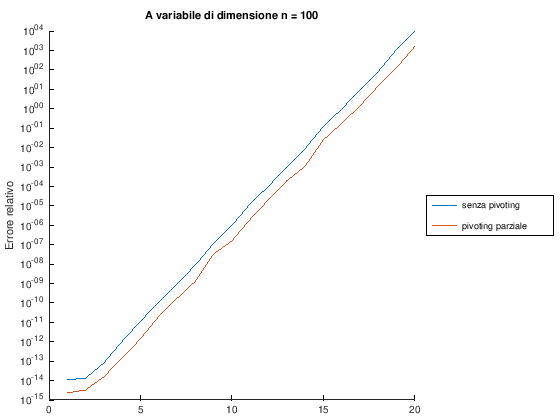

In [19]:
figure
x_n = 1:kmax;
semilogy(x_n, err_rel, x_n, err_rel_p);
legend("senza pivoting", "pivoting parziale","location", "eastoutside");
title("A variabile di dimensione n = 100");
ylabel("Errore relativo");
box off

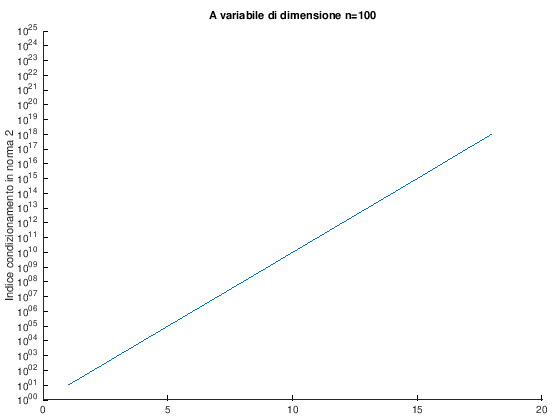

In [20]:
figure
semilogy(cond_A)
title('A variabile di dimensione n=100')
ylabel('Indice condizionamento in norma 2')
ylim([1, 10^25]);
box off

## Esercizio 6

In [21]:
nmin= 2; nmax = 50;
err_rel_chol = zeros(nmax - nmin, 1);
err_rel_gss = zeros(nmax - nmin, 1);

for n = nmin:nmax
    B = rand(n);
    A = B' * B;
    x_es = (1 : n)';
    norm_x_es = norm(x_es);
    b = A * x_es;
    
    [L, U, P] = gauss_partial(A);
    x = lusolve(L, U, P, [], b);
    err_rel_gss(n - nmin + 1) = norm(x_es - x) / norm_x_es;
    
    L_2 = chol(A);
    y_2 = lsolve(L_2', b);
    x_2 = usolve(L_2, y_2);
    err_rel_chol(n - nmin + 1) = norm(x_es - x_2) / norm_x_es;
    
end

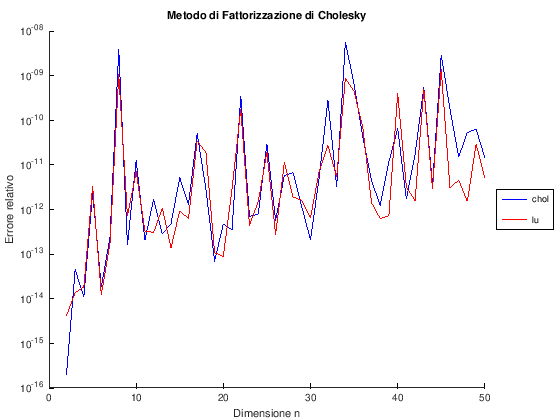

In [22]:
figure
xn=(nmin:nmax)';
semilogy(xn,err_rel_chol,'b',xn,err_rel_gss,'r')
legend('chol', 'lu', "location", "eastoutside")
title('Metodo di Fattorizzazione di Cholesky')
xlabel('Dimensione n')
ylabel('Errore relativo')
box off

Dato che le soluzioni ottenute con i due metodi non si discostano in maniera significativa tra loro, si può concludere che l'algoritmo di Cholesky è stabile.

## Esercizio 7

In [23]:
cont = 0;
x_n = 4:6:40;
A = [];

err_rel_1 = zeros(1,length(x_n));
err_rel_2 = zeros(1,length(x_n));
err_rel_3 = zeros(1,length(x_n));

for n = 4:6:40
    cont = cont + 1;
    
    % costruzione matrice di Hankel
    for i = 1:n
        for k = i+1-n:i
            if k > 0
                A(i,n+k-i) = 2^k;
            else
                A(i,n+k-i) = 2 ^ (1 / (2 - k));
            end
        end
    end
    
    x_es = ones(n, 1);
    b = A * x_es;
    norm_x_es = norm(x_es);
    cond_A(cont) = cond(A);
    
    [L, U, P] = gauss_partial(A);
    x = lusolve(L, U, P, [], b);
    err_rel_1(cont) = norm(x_es - x) / norm_x_es;
    
    [L_1, U_1, P_1, Q] = gauss_total(A);
    x_1 = lusolve(L_1, U_1, P_1, Q, b);
    err_rel_2(cont) = norm(x_es - x_1) / norm_x_es;
    
    [Q, R] = qr(A);
    y = Q' * b; x_hs = usolve(R, y);
    err_rel_3(cont) = norm(x_es - x_hs) / norm_x_es;
    
end

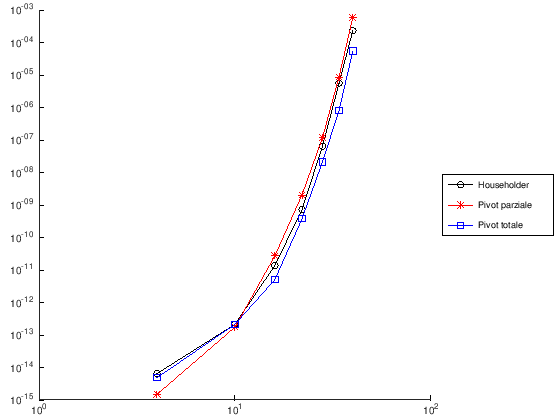

In [24]:
figure
loglog(
    (4:6:40), err_rel_3, 'ko-', ...
    (4:6:40), err_rel_1, 'r*-', ...
    (4:6:40), err_rel_2, 'bs-');

legend('Householder', 'Pivot parziale', 'Pivot totale', "location", "eastoutside")
box off

## Esercizio 8

In [25]:
clear all
cont = 0;
A = [];

for n = 48:2:58
    cont = cont + 1;
    
    % costruzione matrice di Hankel
    for i = 1:n
        for j = 1:n
            if i == j || j == n
                A(i, j) = 1;
            elseif i > j
                A(i, j) = -1;
            else
                A(i, j) = 0;
            end
        end
    end
    
    x_es = ones(n, 1);
    b = A * x_es;
    norm_x_es = norm(x_es);
    cond_A(cont) = cond(A);
    
    [L, U, P] = gauss_partial(A);
    x = lusolve(L, U, P, [], b);
    err_rel_par(cont) = norm(x_es - x) / norm_x_es;
    
    [L_1, U_1, P_1, Q] = gauss_total(A);
    x_1 = lusolve(L_1, U_1, P_1, Q, b);
    err_rel_tot(cont) = norm(x_es - x_1) / norm_x_es;
    
    [Q, R] = qr(A);
    y = Q' * b; x_hs = usolve(R, y);
    err_rel_hous(cont) = norm(x_es - x_hs) / norm_x_es;
    
end

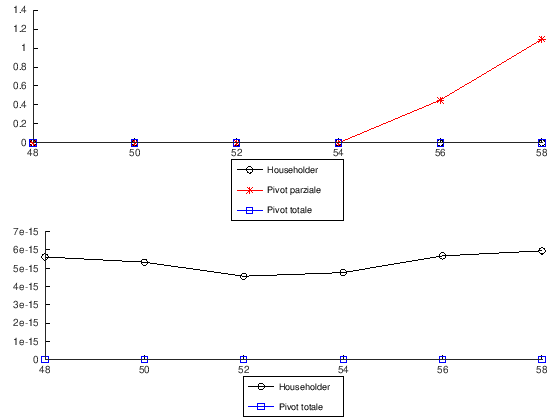

In [26]:
figure
subplot(2,1,1)
plot(
    [48:2:58], err_rel_hous, 'ko-', ...
    [48:2:58], err_rel_par, 'r*-', ...
    [48:2:58], err_rel_tot, 'bs-')

legend('Householder','Pivot parziale','Pivot totale', ...
    "location", "southoutside")
box off

subplot(2,1,2)
plot(
    [48:2:58], err_rel_hous, 'ko-', ...
    [48:2:58], err_rel_tot, 'bs-')

legend('Householder','Pivot totale', ...
    "location", "southoutside")
box off